In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline

In [3]:

IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [4]:
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]

(150, 150, 3)


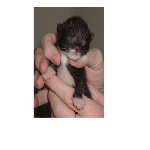

In [5]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [6]:
batch_size = 50
num_classes = 2
epochs = 10
input_shape = (150, 150, 3)

#encode text category label
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'dog', 'dog', 'dog', 'cat', 'cat', 'cat', 'dog', 'dog', 'cat'] [0 1 1 1 0 0 0 1 1 0]


In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

In [10]:

history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - 179s 60ms/step - loss: 0.7156 - accuracy: 0.5520 - val_loss: 0.7522 - val_accuracy: 0.5030
Epoch 2/10
3000/3000 [==============================] - 131s 44ms/step - loss: 0.6674 - accuracy: 0.6250 - val_loss: 0.7170 - val_accuracy: 0.5660
Epoch 3/10
3000/3000 [==============================] - 112s 37ms/step - loss: 0.5850 - accuracy: 0.7013 - val_loss: 0.5827 - val_accuracy: 0.6710
Epoch 4/10
3000/3000 [==============================] - 114s 38ms/step - loss: 0.5067 - accuracy: 0.7573 - val_loss: 0.5825 - val_accuracy: 0.6990
Epoch 5/10
3000/3000 [==============================] - 109s 36ms/step - loss: 0.4561 - accuracy: 0.7833 - val_loss: 0.5890 - val_accuracy: 0.7250
Epoch 6/10
3000/3000 [==============================] - 111s 37ms/step - loss: 0.3714 - accuracy: 0.8310 - val_loss: 0.5978 - val_accuracy: 0.7280
Epoch 7/10
3000/3000 [==============================] - 110s 37ms/step

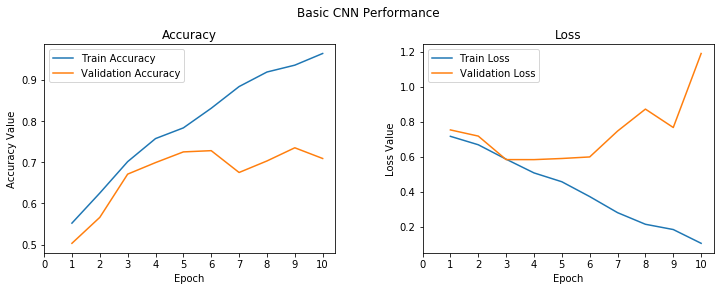

In [11]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,11))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 11, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 11, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [19]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3,3), activation='relu',
               input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(),
             metrics=['accuracy'])

history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/10
3000/3000 [==============================] - 111s 37ms/step - loss: 0.7233 - accuracy: 0.5093 - val_loss: 0.6886 - val_accuracy: 0.5140
Epoch 2/10
3000/3000 [==============================] - 112s 37ms/step - loss: 0.7029 - accuracy: 0.5510 - val_loss: 0.6806 - val_accuracy: 0.5400
Epoch 3/10
3000/3000 [==============================] - 120s 40ms/step - loss: 0.6726 - accuracy: 0.5773 - val_loss: 0.6722 - val_accuracy: 0.6200
Epoch 4/10
3000/3000 [==============================] - 117s 39ms/step - loss: 0.6741 - accuracy: 0.5977 - val_loss: 0.6252 - val_accuracy: 0.6710
Epoch 5/10
3000/3000 [==============================] - 141s 47ms/step - loss: 0.6215 - accuracy: 0.6537 - val_loss: 0.7571 - val_accuracy: 0.6050
Epoch 6/10
3000/3000 [==============================] - 155s 52ms/step - loss: 0.5911 - accuracy: 0.6870 - val_loss: 0.5717 - val_accuracy: 0.7210
Epoch 7/10
3000/3000 [==============================] - 174s 58ms/step

In [26]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                  width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                  horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

Labels: ['cat', 'cat', 'cat', 'cat', 'cat']


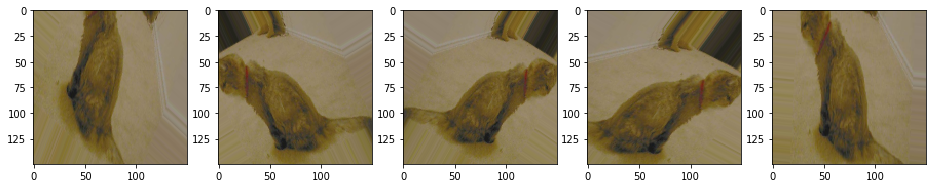

In [33]:
img_id = 6
cat_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                  batch_size=1)
cat = [next(cat_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5,figsize=(16,6))
print('Labels:', [item[1][0] for item in cat])
l = [ax[i].imshow(cat[i][0][0]) for i in range(0,5)]

Labels: ['dog', 'dog', 'dog', 'dog', 'dog']


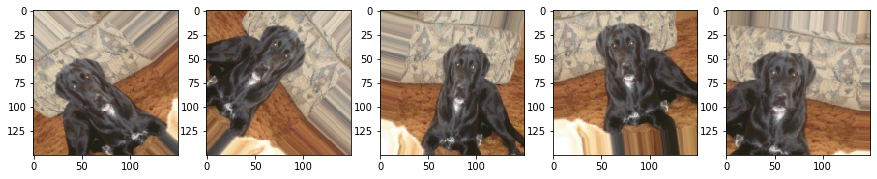

In [36]:
img_id = 1991
dog_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
dog = [next(dog_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(15, 6))
print('Labels:', [item[1][0] for item in dog])
l = [ax[i].imshow(dog[i][0][0]) for i in range(0,5)]

In [37]:
epochs = 5

In [38]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
input_shape = (150, 150, 3)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=epochs,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)       

Epoch 1/5
100/100 [==============================] - 111s 1s/step - loss: 0.6912 - accuracy: 0.5250 - val_loss: 0.6196 - val_accuracy: 0.5010
Epoch 2/5
100/100 [==============================] - 109s 1s/step - loss: 0.6786 - accuracy: 0.5610 - val_loss: 0.6554 - val_accuracy: 0.6130
Epoch 3/5
100/100 [==============================] - 109s 1s/step - loss: 0.6626 - accuracy: 0.5853 - val_loss: 0.7417 - val_accuracy: 0.5550
Epoch 4/5
100/100 [==============================] - 111s 1s/step - loss: 0.6433 - accuracy: 0.6170 - val_loss: 0.5871 - val_accuracy: 0.6360
Epoch 5/5
100/100 [==============================] - 109s 1s/step - loss: 0.6324 - accuracy: 0.6317 - val_loss: 0.7060 - val_accuracy: 0.5550


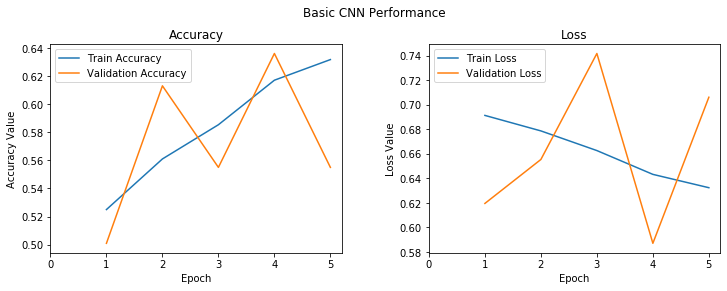

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,6))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 6, 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 6, 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [45]:
from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])   

58892288/58889256 [==============================] - 15s 0us/step


/Users/robinreistadfiske/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7fae32058c10>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7fae3217b8d0>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7fae3207d950>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7fae3206a690>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7fae3206a890>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7fae3280e850>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7fae32844190>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7fae3282e390>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7fae33c87790>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7fae33ca95d0>,block3_conv3,False


(1, 4, 4, 512)


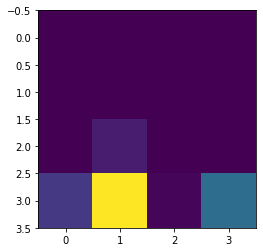

In [46]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [47]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [49]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [50]:
epochs = 30
batch_size = 30

In [51]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Epoch 1/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.4393 - accuracy: 0.7850 - val_loss: 0.2972 - val_accuracy: 0.8700
Epoch 2/30
3000/3000 [==============================] - 8s 3ms/step - loss: 0.2799 - accuracy: 0.8730 - val_loss: 0.3546 - val_accuracy: 0.8410
Epoch 3/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2378 - accuracy: 0.9027 - val_loss: 0.2682 - val_accuracy: 0.8800
Epoch 4/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2041 - accuracy: 0.9147 - val_loss: 0.3558 - val_accuracy: 0.8590
Epoch 5/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1736 - accuracy: 0.9247 - val_loss: 0.3339 - val_accuracy: 0.8720
Epoch 6/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1389 - accuracy: 0.9467 - val_loss: 0.3235 - val_accuracy: 0.8830
Epoch 7/30
3000/3000 [==============================] - 7s 2ms/step - loss: 0.1183 - acc

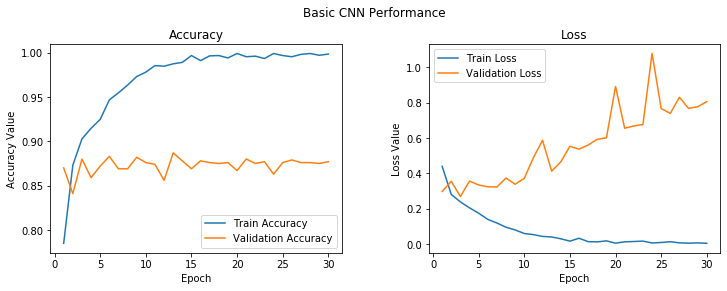

In [52]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [53]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [54]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1) 

Epoch 1/100
100/100 [==============================] - 2391s 24s/step - loss: 0.6584 - accuracy: 0.6073 - val_loss: 0.4902 - val_accuracy: 0.7900
Epoch 2/100
100/100 [==============================] - 2932s 29s/step - loss: 0.5784 - accuracy: 0.7017 - val_loss: 0.4558 - val_accuracy: 0.8250
Epoch 3/100
100/100 [==============================] - 3502s 35s/step - loss: 0.5180 - accuracy: 0.7493 - val_loss: 0.4359 - val_accuracy: 0.8480
Epoch 4/100
100/100 [==============================] - 3009s 30s/step - loss: 0.4870 - accuracy: 0.7767 - val_loss: 0.2839 - val_accuracy: 0.8380
Epoch 5/100
100/100 [==============================] - 876s 9s/step - loss: 0.4596 - accuracy: 0.7823 - val_loss: 0.3519 - val_accuracy: 0.8580
Epoch 6/100
 14/100 [===>..........................] - ETA: 8:52 - loss: 0.4406 - accuracy: 0.7976

KeyboardInterrupt: 